## Importamos las librerias que vamos a utilizar

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
# abrimos el documento
data = pd.read_csv("measurements.csv")

In [114]:
data.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12.0,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,11.2,"5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,12.9,"3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,18.5,"4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [124]:
def comma_conv(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)

In [129]:
# hacemos un apply para quitar las comas y sustituirlo por puntos
data['distance'] = data['distance'].apply(comma_converter)
data['consume'] = data['consume'].apply(comma_converter)
data['temp_inside'] = data['temp_inside'].apply(comma_converter)
data['temp_outside'] = data['temp_outside'].apply(comma_converter)
data['refill liters'] = data['refill liters'].apply(comma_converter)

In [138]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN


In [131]:
# miramos el numero de filas y columnas asi como valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    float64
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 36.5+ KB


In [172]:
# añadimos una columna de distancia acumulado
data['km_absolute'] = data['distance'].cumsum()
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,km_absolute,Consume_ac,consume_ac
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10,28.0,5.0,5.0
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN,40.0,9.2,9.2
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,51.2,14.7,14.7
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN,64.1,18.6,18.6
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,82.6,23.1,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN,7563.1,1888.3,1888.3
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,7579.2,1892.6,1892.6
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN,7595.2,1896.4,1896.4
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,7610.6,1901.0,1901.0


In [173]:
data['consume_ac'] = data['consume'].cumsum()
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,km_absolute,Consume_ac,consume_ac
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10,28.0,5.0,5.0
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN,40.0,9.2,9.2
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,51.2,14.7,14.7
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN,64.1,18.6,18.6
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN,82.6,23.1,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN,7563.1,1888.3,1888.3
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,7579.2,1892.6,1892.6
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN,7595.2,1896.4,1896.4
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,7610.6,1901.0,1901.0


In [142]:
# información general del dataset
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,km_absolute
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385,3559.626031
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282,2287.524551
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000,28.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000,1448.975000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000,3696.900000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000,5387.850000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,7625.300000


In [143]:
# miramos el numero de nulos
nulls= data.isnull().sum()
nulls

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
km_absolute        0
dtype: int64

In [144]:
# porcentaje de mising values
total_cells = np.product(data.shape)
nulls_values = nulls.sum()
percent_missing = (nulls_values / total_cells) * 100
percent_missing

20.955590800951626

In [175]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas', 'km_absolute', 'Consume_ac', 'consume_ac'],
      dtype='object')

In [176]:
# Rellenamos los valores nulos
data_cleaned=data.fillna(value=0, axis=1)

In [177]:
data_cleaned.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,km_absolute,Consume_ac,consume_ac
0,28.0,5.0,26,21.5,12.0,0,E10,0,0,0,45.0,E10,28.0,5.0,5.0
1,12.0,4.2,30,21.5,13.0,0,E10,0,0,0,0.0,0,40.0,9.2,9.2
2,11.2,5.5,38,21.5,15.0,0,E10,0,0,0,0.0,0,51.2,14.7,14.7
3,12.9,3.9,36,21.5,14.0,0,E10,0,0,0,0.0,0,64.1,18.6,18.6
4,18.5,4.5,46,21.5,15.0,0,E10,0,0,0,0.0,0,82.6,23.1,23.1


In [178]:
data_cleaned.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
km_absolute      0
Consume_ac       0
consume_ac       0
dtype: int64

## Data Visualization

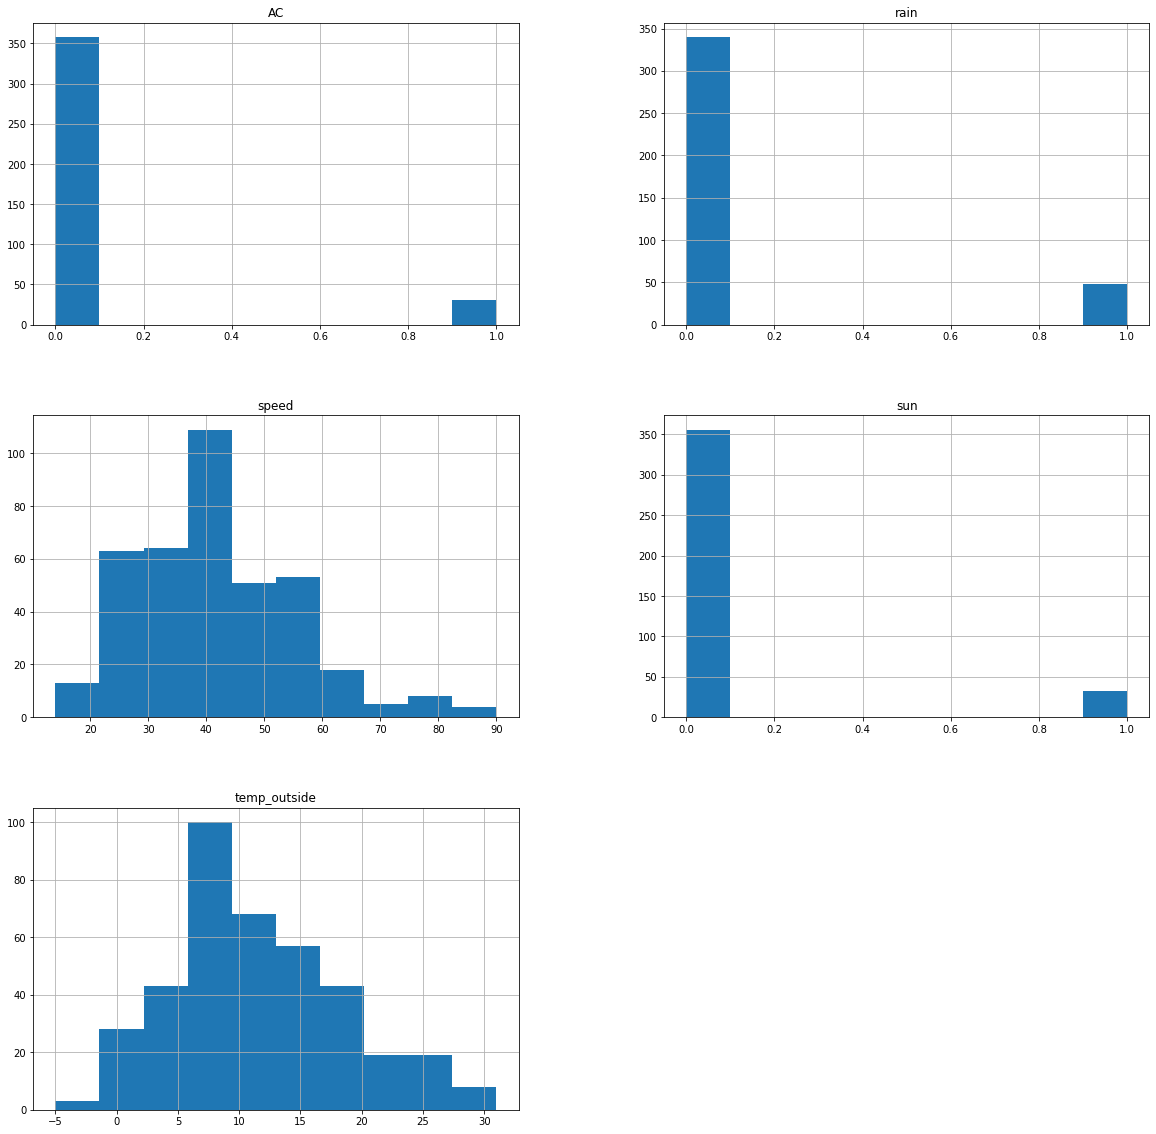

In [14]:
data_cleaned.hist(figsize = (20,20))
plt.show()

In [32]:
columns= data_cleaned.columns
columns

Text(22.745606107026155, 0.5, 'distance [Km]')

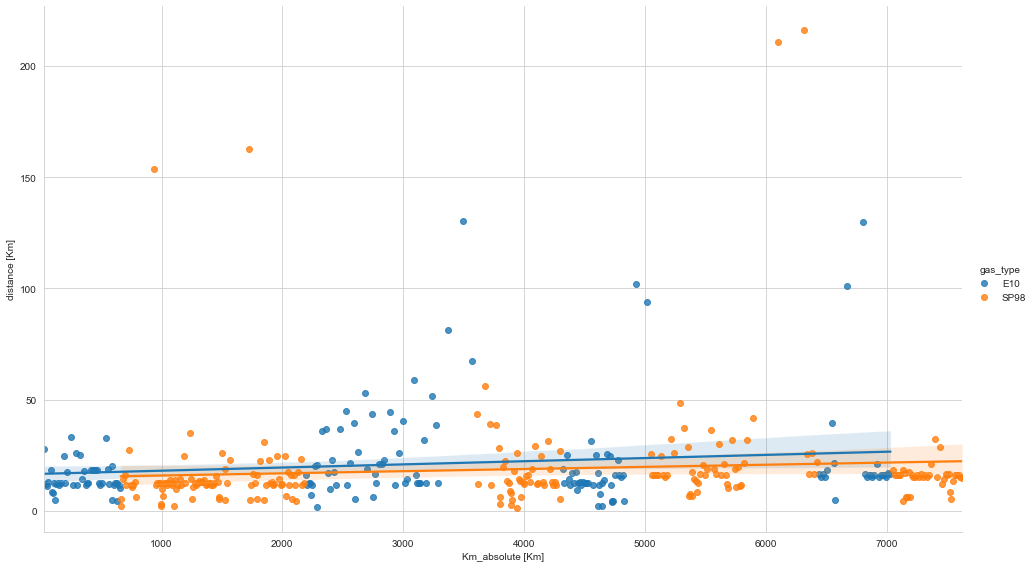

In [188]:
# 
sns.lmplot(data=data_cleaned,x='km_absolute',y='distance', hue='gas_type', height=8, aspect=1.7,)
plt.xlabel('Km_absolute [Km]')
plt.ylabel('distance [Km]')

In [179]:
gas_type=data_cleaned.groupby(['gas_type']).mean()
gas_type

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,km_absolute,Consume_ac,consume_ac
gas_type,,,,,,,,,,,,
E10,21.096250,4.931250,43.506250,21.506250,10.11875,0.043750,0.100000,0.075000,1.237500,3150.808750,896.895625,896.895625
SP98,18.639912,4.899123,40.820175,21.072368,12.22807,0.100877,0.140351,0.087719,1.247807,3846.515351,1064.329825,1064.329825


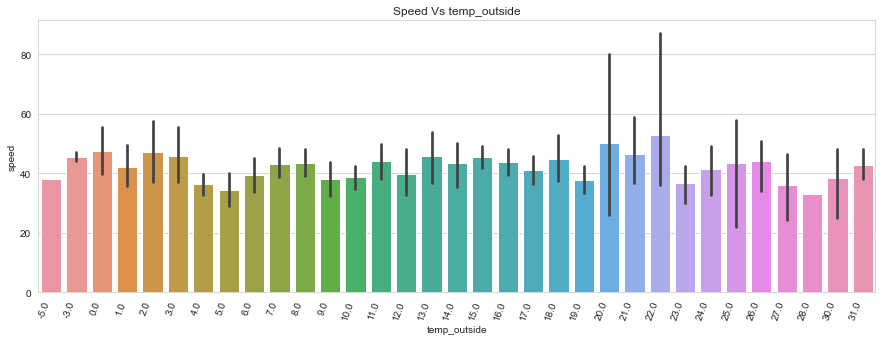

In [165]:
# lo representamos gráficamente
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="temp_outside", y="speed", data=data_cleaned)
plt.xticks(rotation=70, ha='right')
plt.title("Speed Vs temp_outside")
plt.show()

In [153]:
gas_type["speed"]

gas_type
E10     43.506250
SP98    40.820175
Name: speed, dtype: float64

In [154]:
# vemos que el consumo de SP98 es mucho mayor que el del Etanol10
gas_type_sum=data_cleaned.groupby(['gas_type']).sum()
gas_type_sum

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,km_absolute
gas_type,,,,,,,,,,
E10,3375.4,789.0,6961,3441.0,1619.0,7,16,12,198.0,504129.4
SP98,4249.9,1117.0,9307,4804.5,2788.0,23,32,20,284.5,877005.5


In [155]:
# diferencia de consumo por tipo de combustible y por speed=gas_type_sum["speed"]
speed

gas_type
E10     6961
SP98    9307
Name: speed, dtype: int64

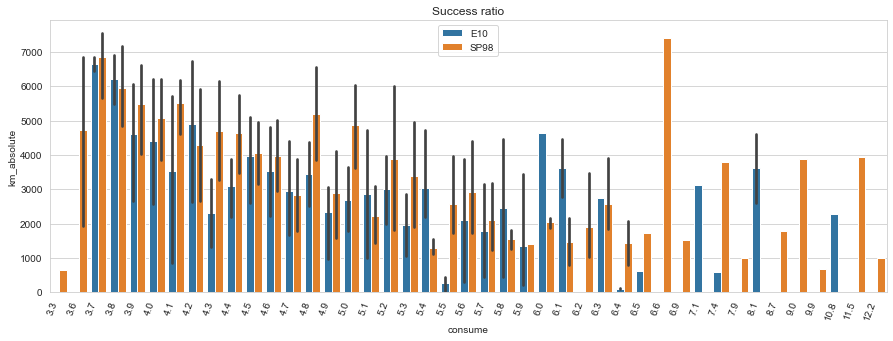

In [161]:
# Representación gráfica
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="consume", y="km_absolute", hue='gas_type', data=data_cleaned)
plt.xticks(rotation=70, ha='right')
plt.title("Consumo vs Km_absoluto por tipo de combustible")
plt.legend()
plt.show()

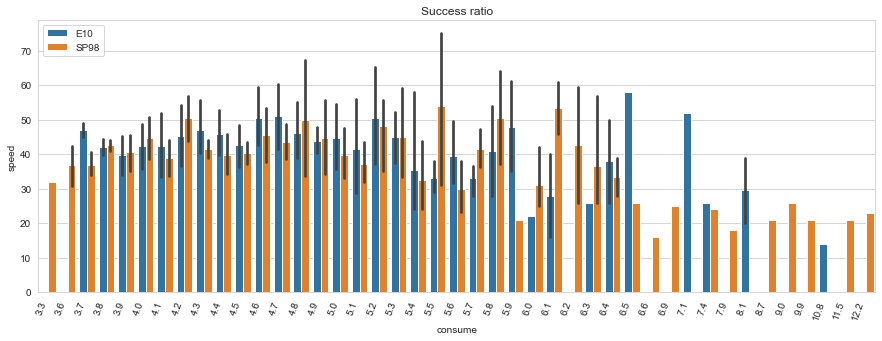

In [162]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="consume", y="speed", data=data_cleaned, hue='gas_type')
plt.xticks(rotation=70, ha='right')
plt.title("Consumo vs Velocidad por tipo de combustible")
plt.legend()
plt.show()

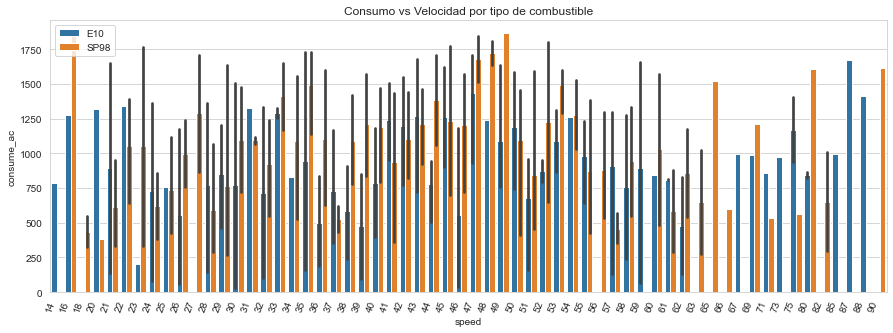

In [181]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="speed", y="consume_ac", data=data_cleaned, hue='gas_type')
plt.xticks(rotation=70, ha='right')
plt.title("Consumo acumulado vs Velocidad por tipo de combustible")
plt.legend()
plt.show()

In [80]:
data_cleaned["gas_type"].value_counts()

1    228
0    160
Name: gas_type, dtype: int64

Text(22.413511029411772, 0.5, 'temp_outside [°C]')

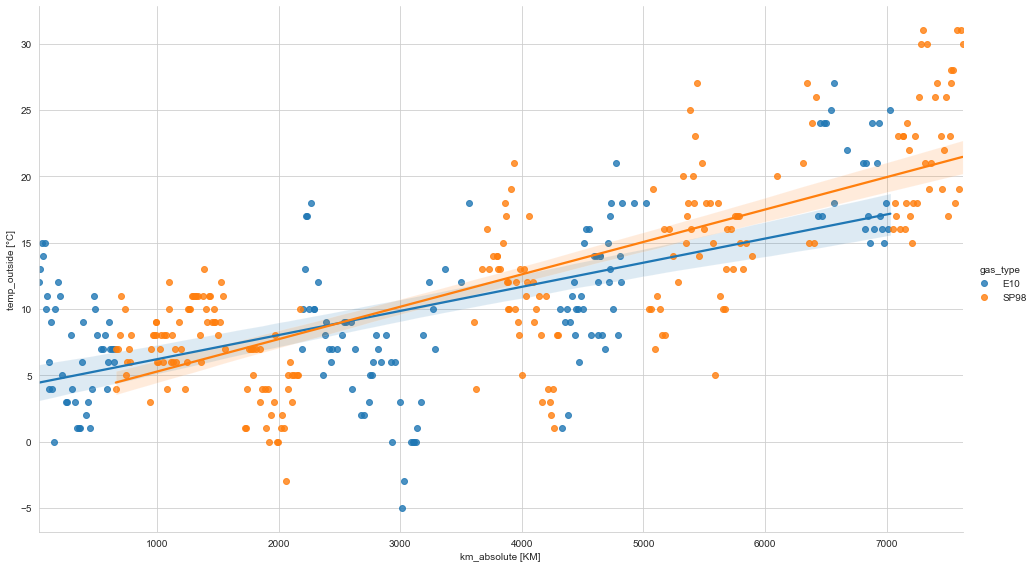

In [183]:
sns.lmplot(data = data_cleaned, x = 'km_absolute', y =  'temp_outside',hue='gas_type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp_outside [°C]')

In [194]:
## vemos las desviaciones estandar de los datos que queremos comparar (distancia)
std_e10 = data_cleaned[data_cleaned['gas_type'] == 'E10']['distance'].std()
std_sp98 = data_cleaned[data_cleaned['gas_type'] == 'SP98']['distance'].std()
std_e10, std_sp98

(20.3072341650448, 24.179598455931174)

In [197]:
## vemos las desviaciones estandar de los datos que queremos comparar (speed)
std_sp_e10 = data_cleaned[data_cleaned['gas_type'] == 'E10']['speed'].std()
std_sp_sp98 = data_cleaned[data_cleaned['gas_type'] == 'SP98']['speed'].std()
std_sp_e10, std_sp_sp98

(14.077948711978845, 13.170121570119575)

In [205]:
### Exportamos nuestro csv una vez está limpio para la visualización de datos
data_cleaned.to_csv("data_cleaned.csv")